# Tehnici de clasificare supervizată

<b>Tehnicile de clasificare supervizată </b> sunt o categorie de algoritmi de învățare automată utilizate pentru a prezice clasa sau categoria unor date pe baza unui set de date cu etichetate. În clasificarea supervizată, algoritmul învață dintr-un set de date de antrenament în care sunt furnizate caracteristicile de intrare (variabile independente) și etichetele de ieșire corespunzătoare (variabilă dependentă). Scopul este de a construi un model care poate prezice cu precizie etichetele claselor pentru date noi, nevăzute.

Am ales să analizez setul de date conține informații despre stele, inclusiv temperatura, luminozitatea, raza și clasa lor spectrală.

## Importarea Librariilor

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Incarcarea setului de date

In [30]:
df = pd.read_csv(r"C:\Users\filth\Desktop\an3sem2\ia\lab2\Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Clasa care voi încerca s-o prezic ulterior va fi **Type**, care reprezintă tipul stelei, conform acestei notații:

- **Type**  
  - Red Dwarf - 0  
  - Brown Dwarf - 1  
  - White Dwarf - 2  
  - Main Sequence - 3  
  - Super Giants - 4  
  - Hyper Giants - 5

Am utilizat seaborn pentru a crea un diagramă pairplot cu nuanța indicată de coloana Type.

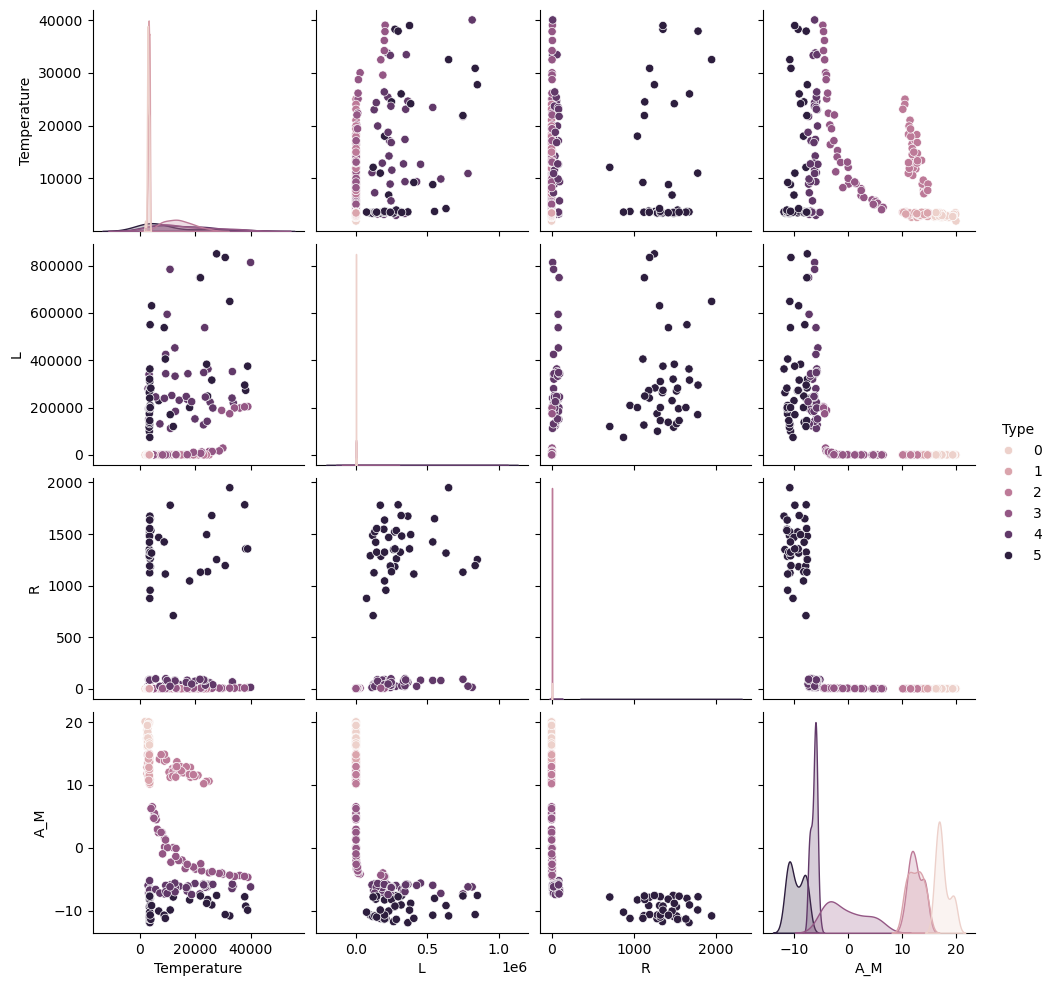

In [32]:
pairplot = sns.pairplot(df, hue='Type')

## Preprocesarea Datelor

Setul de date conține variabile categoriale precum `Color` și `Spectral_Class`. Am tranformat aceste variabile în valori numerice folosind `LabelEncoder`.

In [36]:
label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Spectral_Class'] = label_encoder.fit_transform(df['Spectral_Class'])

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


### Scalarea Caracteristicilor Numerice  

Am scalat caracteristicile numerice (`Temperature`, `L`, `R`, `A_M`) folosind `StandardScaler` pentru a mă asigura că toate caracteristicile au aceeași scară.  

In [38]:
scaler = StandardScaler()
numerical_features = ['Temperature', 'L', 'R', 'A_M']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,-0.779382,-0.598624,-0.459210,1.116745,8,5,0
1,-0.782110,-0.598624,-0.459241,1.162414,8,5,0
2,-0.828477,-0.598624,-0.459342,1.362213,8,5,0
3,-0.807496,-0.598624,-0.459229,1.167171,8,5,0
4,-0.897819,-0.598624,-0.459340,1.491607,8,5,0


## Împărțirea Datelor în Seturi de Antrenare și Testare  
Am împărțitrt setul de date în seturi de antrenare și testare folosind o împărțire de 80-20. 


In [40]:
X = df.drop(columns=['Type'])
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Set de antrenament X:", X_train.shape)
print("Set de testare X:", X_test.shape)

Set de antrenament X: (192, 6)
Set de testare X: (48, 6)


## Naive Bayes  

În continuare am antrenat un model Naive Bayes și i-am evaluat performanța folosind un raport de clasificare și o matrice de confuzie.  <br>
<b>Categoria:</b> algoritm bazat pe criteriul Bayes <br>
- Naive Bayes presupune că caracteristicile de intrare sunt condiționat independente, având în vedere eticheta clasei.  
- Calculează probabilitatea fiecărei clase pe baza caracteristicilor de intrare și prezice clasa cu cea mai mare probabilitate.  
- Este utilizat frecvent pentru clasificarea binară, dar poate gestiona și clasificarea multi-clasă.  


In [229]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48

Naive Bayes Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 1  6  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  7  1  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


#### Interpretare raportului de clasificare 

**Precision:** Reprezintă proporția instanțelor corect clasificate ca fiind dintr-o anumită clasă, raportată la totalul instanțelor clasificate ca aparținând acelei clase. De exemplu, pentru clasa 0, modelul a prezis corect 0.89 din instanțele sale ca fiind din clasa 0.

**Recall:** Reprezintă proporția instanțelor dintr-o clasă care au fost corect identificate de model. De exemplu, pentru clasa 0, modelul a identificat toate cele 8 instanțe corect (100%).

**F1-score:** Este media armonică a precision și recall, oferind o măsură echilibrată a performanței. Este util atunci când avem un set dezechilibrat de date, pentru a lua în considerare atât precizia cât și completitudinea.

**Support:** Reprezintă numărul de instanțe din fiecare clasă.


#### Interpretare matricii de confuzie  

În matricea de confuzie:  

- **Liniile reprezintă clasele reale**, iar **coloanele reprezintă clasele prezise**.  
- Fiecare celulă indică numărul de eșantioane care au fost:  
  - **Clasificate corect** (*celulele diagonale*): De exemplu, **8 eșantioane** din clasa **0** au fost corect prezise ca **type 0**.  
  - **Clasificate greșit** (*celulele din afara diagonalei*): De exemplu, **1 eșantion** din clasa **0** a fost incorect prezis ca **type 1**.  

#### Ce informații oferă matricea de confuzie?  
- **Care clase sunt confundate frecvent** – De exemplu, clasa **1** este uneori prezisă greșit ca **type 0**.  
- **Performanța generală a modelului pentru fiecare clasă**, evidențiind unde apar cele mai mari erori.  


## Support Vector Machine (SVM)  
 
**Categorie:** bazat pe funcții  

**Explicație:**  
- SVM modelează problema de clasificare prin găsirea unui **hiperplan optim** care separă punctele de date ale diferitelor clase în spațiul caracteristicilor.  
- Utilizează o **reprezentare funcțională** a datelor de intrare și optimizează **marginea** dintre hiperplan și cele mai apropiate puncte de date (*vectorii de suport*).  
- SVM poate gestiona atât **clasificarea liniară**, cât și **clasificarea neliial**.  


In [167]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48

SVM Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 1  6  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


#### Analiza cum influențează valoarea unui parametru de regularizare (C) asupra ratei de eroare a unui model SVM

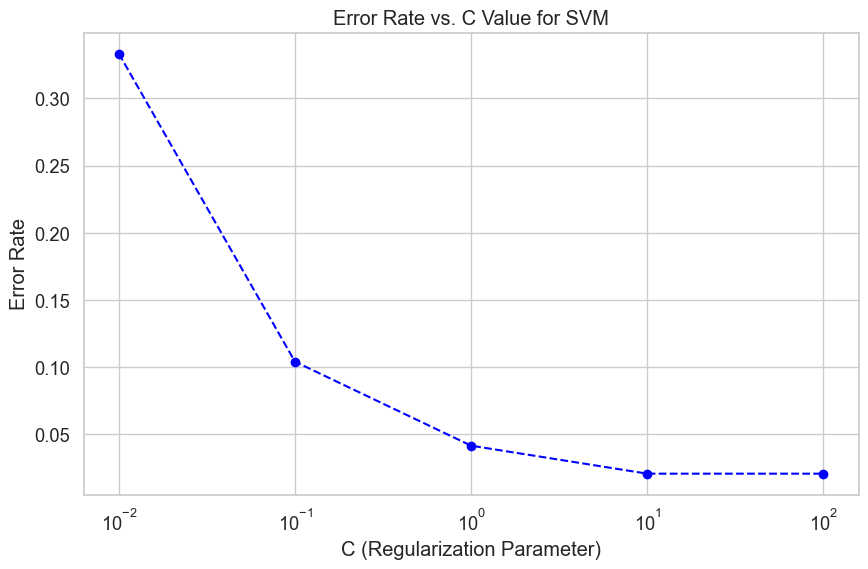

In [242]:
error_rate = []
c_values = [0.01, 0.1, 1, 10, 100] 

for c in c_values:
    svm_model = SVC(kernel='linear', C=c)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(c_values, error_rate, marker='o', linestyle='--', color='blue')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. C Value for SVM')
plt.xscale('log') 
plt.show()

## Decision Tree  

**Categorie:** bazat pe reguli de decizie 

**Explicație:**  
- Arborii de decizie clasifică datele prin generarea unui set de reguli **„daca-atunci”** bazate pe caracteristicile de intrare.  
- Regulele sunt reprezentate într-o structură de tip arbore, unde:  
  - **Nodurile** corespund caracteristicilor.  
  - **Ramurile** reprezintă valorile posibile ale caracteristicilor.  
  - **Frunzele** reprezintă etichetele claselor.  


In [58]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Decision Tree Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


## Random Forest  

**Categorie:** Bazat pe arbori  

**Explicație:**  
- **Random Forest** este o metodă care combină mai mulți arbori de decizie pentru a îmbunătăți performanța și a reduce supraspecializarea (overfitting).  
- Fiecare arbore din pădure este antrenat pe un **subset aleator** al datelor și caracteristicilor, iar prezicerea finală se face prin agregarea prezicerilor tuturor arborilor (de exemplu, folosind **votul majoritar** pentru clasificare).  
- Este o metodă bazată pe arbori deoarece construiește mai mulți arbori de decizie și combină rezultatele acestora.  


In [60]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

Random Forest Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


## AdaBoost

**Categorie:** Meta-Metodă  

**Explicație:**  
- **AdaBoost** este o metodă de ansamblu care combină mai mulți clasificatori slabi (de exemplu, arbori de decizie cu adâncimea 1) pentru a crea un clasificator puternic.  
- Funcționează prin **antrenarea iterativă** a clasificatorilor slabi pe date și **reponderarea punctelor de date** pe baza erorilor lor de clasificare. Punctele de date clasificate greșit primesc **ponderi mai mari**, astfel încât următorul clasificator slab să se concentreze mai mult pe ele.  
- Prezicerea finală se face prin combinarea prezicerilor tuturor clasificatorilor slabi, **ponderate** de performanța lor.  


In [62]:
#ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, algorithm="SAMME")
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

print("AdaBoost Classification Report:\n", classification_report(y_test, ada_predictions))
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, ada_predictions))

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

AdaBoost Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]


# Analiza Comparativă a Performanțelor a toate 5 Tehnici de Clasificare Supervizată

Fiecare metodă a afisat un comportament diferit în ceea ce privește precizia, recall-ul și f1-score-ul. Și anume:

### Naive Bayes (GaussianNB)
- **Performanță:** Naive Bayes a obținut o accuracy de 96%, cu scoruri mari pentru fiecare clasă, ceea ce sugerează că modelul a reușit să prezică corect majoritatea cazurilor. Clasa cu performanță perfectă a fost clasa 2 și clasa 5, iar clasa 1 a avut o performanță mai slabă.
- **Neajunsuri:** Modelul a avut unele confuzii între clasele 0 și 1.

### Support Vector Machine (SVM)
- **Performanță:** SVM a obținut o acuratețe similară de 96%, cu valori excelente pentru f1-score și recall. Performanța acestui model este consistentă, în special pentru clasele 2 și 5, iar pentru clasa 1, rezultatele au fost ceva mai slabe comparativ cu alte clase.
- **Neajunsuri:** Clasa 1 a avut un recall mai scăzut comparativ cu celelalte clase.

### Arborele de Decizie (Decision Tree)
- **Performanță:** Modelul a atins o acuratețe de 100%, cu valori perfecte de precision, recall și f1-score pentru toate clasele.
- **Neajunsuri:** Deși performanța a fost impecabilă, arborii de decizie pot fi susceptibili la overfitting în cazul în care există un număr mare de clase.

### Pădurea Aleatoare (Random Forest)
- **Performanță:** Random Forest a obținut o acuratețe perfectă de 100%, similar cu arborii de decizie, și a avut scoruri excelente pentru toate clasele. 
- **Neajunsuri:** În general, Random Forest este mai stabil decât un arbore de decizie individual, dar poate fi mai lent în faza de antrenare și mai greu de interpretat din cauza complexității sale.

### AdaBoost
- **Performanță:** AdaBoost a înregistrat performanțe excelente, similar cu Random Forest și arborele de decizie, cu o acuratețe de 100%. 
- **Neajunsuri:** Ca și Random Forest, AdaBoost poate fi mai dificil de interpretat, dar este mai eficient în gestionarea unor seturi de date care prezintă erori de clasificare.

# Concluzie Generală

În cadrul acestei lucrari de laborator am învățat analiza și compararea performanței mai multor tehnici de clasificare supervizată. Am implementat și evaluat modelelor precum Naive Bayes, SVM, Arbori de Decizie, Pădurea Aleatoare și AdaBoost. Fiecare tehnică a prezentat puncte forte și puncte slabe, în funcție de structura și complexitatea datelor. De exemplu, Naive Bayes a avut o performanță bună pe datele distribuite normal, dar a avut dificultăți în diferențierea claselor asemănătoare. Arborii de decizie și Pădurea Aleatoare au obținut rezultate excelente, dar pot avea probleme la overfitting dacă nu sunt ajustați corespunzător. Am descoperit, de asemenea, avantajele metodelor cum ar fi Pădurea Aleatoare și AdaBoost, care combină mai mulți clasificatori pentru a îmbunătăți performanța. În plus, evaluarea modelelor utilizând metrici precum acuratețea, recall-ul și f1-score-ul a subliniat importanța de a considera atât performanța generală, cât și comportamentul specific al claselor. 
Așadar, această lucrare de laborator mi-a oferit informații practice despre aplicarea tehnicilor de clasificare și importanța unei evaluări atente și a alegerii corecte a modelului.
